In [0]:
import time

import pandas as pd
import numpy as np
from pyspark.sql.functions import count,isnan, when, avg, col, from_unixtime, lit, months_between,floor, unix_timestamp,countDistinct, expr, datediff, lag, desc
from pyspark.sql.types import IntegerType
from pyspark.sql.window import Window
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from pyspark.ml import Pipeline
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.classification import LogisticRegression, GBTClassifier, LinearSVC, RandomForestClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

In [0]:
file_location = "/FileStore/tables/medium_sparkify_event_data_json.gz"
file_type = "json"

df = spark.read.format(file_type)\
     .option("inferSchema", "false")\
     .option("header", "false")\
     .option("sep", ",")\
     .load(file_location)

# df = spark.read.csv("/FileStore/tables/medium_sparkify_event_data_json.gz")

display(df)

artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
Martin Orford,Logged In,Joseph,M,20,Morales,597.55057,free,"Corpus Christi, TX",PUT,NextSong,1532063507000,292,Grand Designs,200,1538352011000,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36""",293
John Brown's Body,Logged In,Sawyer,M,74,Larson,380.21179,free,"Houston-The Woodlands-Sugar Land, TX",PUT,NextSong,1538069638000,97,Bulls,200,1538352025000,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36""",98
Afroman,Logged In,Maverick,M,184,Santiago,202.37016,paid,"Orlando-Kissimmee-Sanford, FL",PUT,NextSong,1535953455000,178,Because I Got High,200,1538352118000,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36""",179
null,Logged In,Maverick,M,185,Santiago,null,paid,"Orlando-Kissimmee-Sanford, FL",PUT,Logout,1535953455000,178,null,307,1538352119000,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36""",179
Lily Allen,Logged In,Gianna,F,22,Campos,194.53342,paid,"Mobile, AL",PUT,NextSong,1535931018000,245,Smile (Radio Edit),200,1538352124000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,246
Carter USM,Logged In,Sofia,F,266,Gordon,138.29179,paid,"Rochester, MN",PUT,NextSong,1533175710000,162,Airplane Food,200,1538352125000,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.94 Safari/537.36""",163
null,Logged Out,null,null,186,null,null,paid,null,GET,Home,null,178,null,200,1538352148000,null,
null,Logged Out,null,null,187,null,null,paid,null,GET,Home,null,178,null,200,1538352151000,null,
null,Logged Out,null,null,188,null,null,paid,null,GET,Home,null,178,null,200,1538352168000,null,
null,Logged Out,null,null,189,null,null,paid,null,PUT,Login,null,178,null,307,1538352169000,null,


In [0]:
df.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [0]:
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+----+------+---+---------+------+
|artist|auth|firstName|gender|itemInSession|lastName|length|level|location|method|page|registration|sessionId|song|status| ts|userAgent|userId|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+----+------+---+---------+------+
|     0|   0|        0|     0|            0|       0|     0|    0|       0|     0|   0|           0|        0|   1|     0|  0|        0|     0|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+----+------+---+---------+------+



In [0]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+------+------+---+---------+------+
|artist|auth|firstName|gender|itemInSession|lastName|length|level|location|method|page|registration|sessionId|  song|status| ts|userAgent|userId|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+------+------+---+---------+------+
|110828|   0|    15700| 15700|            0|   15700|110828|    0|   15700|     0|   0|       15700|        0|110828|     0|  0|    15700|     0|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+------+------+---+---------+------+



In [0]:
#lets filter out the entries with missing names
df = df.filter(df.firstName.isNotNull())

In [0]:
df.describe("ts").show(truncate = False)

+-------+---------------------+
|summary|ts                   |
+-------+---------------------+
|count  |528005               |
|mean   |1.5409669277485146E12|
|stddev |1.4812330940304391E9 |
|min    |1538352011000        |
|max    |1543622466000        |
+-------+---------------------+



In [0]:
ts = int(1538352011000)
ts /= 1000
print("Start Time: {}".format(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')))

ts = int(1543622466000)
ts /= 1000
print("End Time: {}".format(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')))

Start Time: 2018-10-01 00:00:11
End Time: 2018-12-01 00:01:06


In [0]:
# add a constant column for start date
df = df.withColumn('start_date', lit('2018-10-01 00:00:00'))

In [0]:
# time in seconds
convert_to_seconds = udf(lambda x : x//1000, IntegerType())
df = df.withColumn("adj_ts", convert_to_seconds('ts'))
df = df.withColumn("adj_reg", convert_to_seconds('registration'))

# drop all the timestamp columns. Will not need them
columns_to_drop = ['registration', 'ts']
df = df.drop(*columns_to_drop)

# converting to utc format
df = df.withColumn("ts", from_unixtime(col("adj_ts")))
df = df.withColumn("registration", from_unixtime(col("adj_reg")))

columns_to_drop = ['adj_ts', 'adj_reg']
df = df.drop(*columns_to_drop)


In [0]:
# number the months starting from the very first month of the analysis
df = df.withColumn("months_btw", floor(months_between(df.ts, df.start_date)))

In [0]:
def define_churn(x):
    """
    Defining churn as cancellation of service or downgrading from premium to free tier.
    """
    if x == "Cancellation Confirmation":
        return 1
    elif x == "Submit Downgrade":
        return 1
    else:
        return 0
    
churn_event = udf(lambda x : define_churn(x), IntegerType())
df = df.withColumn("churn", churn_event("page"))

In [0]:
# encoding free and paid as 0 and 1 
df = df.replace(["free", "paid"], ["0", "1"], "level")

# encoding male and female as 0 and 1
df = df.replace(["M", "F"], ["0", "1"], "gender")

In [0]:
display(df)

artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,sessionId,song,status,userAgent,userId,start_date,ts,registration,months_btw,churn
Martin Orford,Logged In,Joseph,0,20,Morales,597.55057,0,"Corpus Christi, TX",PUT,NextSong,292,Grand Designs,200,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36""",293,2018-10-01 00:00:00,2018-10-01 00:00:11,2018-07-20 05:11:47,0,0
John Brown's Body,Logged In,Sawyer,0,74,Larson,380.21179,0,"Houston-The Woodlands-Sugar Land, TX",PUT,NextSong,97,Bulls,200,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36""",98,2018-10-01 00:00:00,2018-10-01 00:00:25,2018-09-27 17:33:58,0,0
Afroman,Logged In,Maverick,0,184,Santiago,202.37016,1,"Orlando-Kissimmee-Sanford, FL",PUT,NextSong,178,Because I Got High,200,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36""",179,2018-10-01 00:00:00,2018-10-01 00:01:58,2018-09-03 05:44:15,0,0
null,Logged In,Maverick,0,185,Santiago,null,1,"Orlando-Kissimmee-Sanford, FL",PUT,Logout,178,null,307,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36""",179,2018-10-01 00:00:00,2018-10-01 00:01:59,2018-09-03 05:44:15,0,0
Lily Allen,Logged In,Gianna,1,22,Campos,194.53342,1,"Mobile, AL",PUT,NextSong,245,Smile (Radio Edit),200,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,246,2018-10-01 00:00:00,2018-10-01 00:02:04,2018-09-02 23:30:18,0,0
Carter USM,Logged In,Sofia,1,266,Gordon,138.29179,1,"Rochester, MN",PUT,NextSong,162,Airplane Food,200,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.94 Safari/537.36""",163,2018-10-01 00:00:00,2018-10-01 00:02:05,2018-08-02 02:08:30,0,0
null,Logged In,Maverick,0,190,Santiago,null,1,"Orlando-Kissimmee-Sanford, FL",GET,Home,178,null,200,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36""",179,2018-10-01 00:00:00,2018-10-01 00:02:56,2018-09-03 05:44:15,0,0
Aerosmith,Logged In,Lacey,1,107,Castaneda,220.39465,0,"El Campo, TX",PUT,NextSong,442,Walk This Way,200,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.94 Safari/537.36""",175,2018-10-01 00:00:00,2018-10-01 00:03:35,2018-09-21 13:20:32,0,0
null,Logged In,Colin,0,0,Larson,null,0,"Dallas-Fort Worth-Arlington, TX",GET,Home,497,null,200,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:30.0) Gecko/20100101 Firefox/30.0,100,2018-10-01 00:00:00,2018-10-01 00:04:01,2018-09-26 17:17:35,0,0
Amy Winehouse,Logged In,Colin,0,1,Larson,201.50812,0,"Dallas-Fort Worth-Arlington, TX",PUT,NextSong,497,Teach Me Tonight,200,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:30.0) Gecko/20100101 Firefox/30.0,100,2018-10-01 00:00:00,2018-10-01 00:04:19,2018-09-26 17:17:35,0,0


In [0]:
df.select("page").dropDuplicates().show(truncate = False)

+-------------------------+
|page                     |
+-------------------------+
|Cancel                   |
|Submit Downgrade         |
|Thumbs Down              |
|Home                     |
|Downgrade                |
|Roll Advert              |
|Logout                   |
|Save Settings            |
|Cancellation Confirmation|
|About                    |
|Settings                 |
|Add to Playlist          |
|Add Friend               |
|NextSong                 |
|Thumbs Up                |
|Help                     |
|Upgrade                  |
|Error                    |
|Submit Upgrade           |
+-------------------------+



In [0]:
df_cancel = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Cancel") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numCancelVisits')

In [0]:
display(df_cancel)

userId,months_btw,numCancelVisits
100011,1,1
118,1,1
85,1,1
100001,0,1
100047,0,1
100024,1,1
231,0,1
296,0,1
200002,0,1
200037,0,1


In [0]:
df_upgrade = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Upgrade") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numUpgradeVisits')

In [0]:
display(df_upgrade)

userId,months_btw,numUpgradeVisits
55,0,1
149,0,1
200001,0,1
126,0,3
127,0,1
100022,0,3
5,1,1
200038,0,2
100012,0,2
100019,0,2


Output can only be rendered in Databricks

In [0]:
df_downgrade = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Downgrade") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numDowngradeVisits')

In [0]:
display(df_downgrade)

userId,months_btw,numDowngradeVisits
149,0,2
228,1,15
120,0,9
127,0,13
126,0,18
209,0,4
2,1,2
185,1,11
100022,0,12
100026,1,2


Output can only be rendered in Databricks

In [0]:
df_home = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Home") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numHomeVisits')

In [0]:
display(df_home)

userId,months_btw,numHomeVisits
55,0,18
149,0,19
228,1,71
211,0,6
120,0,31
200001,0,15
127,0,45
126,0,81
209,0,20
155,1,7


Output can only be rendered in Databricks

In [0]:
df_about = df.select('userId', 'months_btw', 'page') \
.where(df.page=="About") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numAboutVisits')

In [0]:
display(df_about)

userId,months_btw,numAboutVisits
149,0,2
55,0,1
228,1,3
120,0,1
126,0,1
100022,0,3
200029,1,1
207,1,3
300048,1,2
278,0,1


Output can only be rendered in Databricks

In [0]:
df_settings = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Settings") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numSettingsVisits')

In [0]:
display(df_settings)

userId,months_btw,numSettingsVisits
55,0,3
149,0,5
228,1,5
211,0,1
120,0,6
200001,0,1
127,0,7
126,0,16
209,0,4
155,1,1


Output can only be rendered in Databricks

In [0]:
df_saveSettings = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Save Settings") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numSaveSettings')

In [0]:
display(df_saveSettings)

userId,months_btw,numSaveSettings
149,0,1
55,0,1
228,1,1
120,0,1
200001,0,1
126,0,4
127,0,2
155,1,1
185,1,1
2,1,1


Output can only be rendered in Databricks

Output can only be rendered in Databricks

In [0]:
df_addPlaylist = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Add to Playlist") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numAddPlaylists')

In [0]:
display(df_addPlaylist)

userId,months_btw,numAddPlaylists
55,0,7
149,0,20
228,1,47
211,0,4
120,0,31
200001,0,11
127,0,23
126,0,52
209,0,16
2,1,10


Output can only be rendered in Databricks

In [0]:
df_thumbsUp = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Thumbs Up") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numThumbsUp')

In [0]:
display(df_thumbsUp)

userId,months_btw,numThumbsUp
55,0,14
149,0,35
228,1,70
120,0,60
211,0,4
200001,0,17
127,0,46
126,0,96
209,0,25
2,1,16


Output can only be rendered in Databricks

In [0]:
df_thumbsDown = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Thumbs Down") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numThumbsDown')

In [0]:
display(df_thumbsDown)

userId,months_btw,numThumbsDown
55,0,7
149,0,2
228,1,11
120,0,12
200001,0,8
126,0,21
127,0,6
209,0,4
2,1,3
185,1,17


Output can only be rendered in Databricks

In [0]:
df_songsPlayed = df.select('userId', 'months_btw', 'page') \
.where(df.page=="NextSong") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numSongsPlayed')

In [0]:
display(df_songsPlayed)

userId,months_btw,numSongsPlayed
55,0,286
149,0,478
228,1,1568
120,0,977
211,0,104
200001,0,251
127,0,930
126,0,2127
209,0,498
2,1,296


Output can only be rendered in Databricks

In [0]:
df_totalListen = df.select('userId', 'months_btw', 'length') \
.groupBy('userId', 'months_btw') \
.agg({'length':'sum'}) \
.withColumnRenamed('sum(length)', 'totalListenTime')

In [0]:
display(df_totalListen)

userId,months_btw,totalListenTime
55,0,69709.37557000003
149,0,120755.50572000004
228,1,388095.4633500008
211,0,25004.12590000001
120,0,244044.0436699998
200001,0,65241.85187000004
127,0,231141.82164999994
126,0,522011.5089200001
209,0,123372.93985999998
2,1,74382.25921000002


Output can only be rendered in Databricks

In [0]:
df_songsPerSession = df.select('userId', 'months_btw', 'page', 'sessionId') \
.where(df.page=="NextSong") \
.groupBy('userId', 'months_btw', 'sessionId') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'SongsPerSession')
# avg number of songs per session
df_avgSongsPerSession = df_songsPerSession.groupBy('userId', 'months_btw') \
.agg(avg(df_songsPerSession.SongsPerSession).alias('avgSongsPerSession'))

In [0]:
display(df_avgSongsPerSession)

userId,months_btw,avgSongsPerSession
228,1,104.53333333333333
149,0,119.5
55,0,31.77777777777778
200001,0,35.857142857142854
120,0,195.4
211,0,104.0
100026,1,32.333333333333336
126,0,118.16666666666667
127,0,71.53846153846153
2,1,49.333333333333336


Output can only be rendered in Databricks

In [0]:
# number of sessions
df_numSession = df.select('userId', 'months_btw', 'sessionId').dropDuplicates() \
.groupby('userId', 'months_btw').agg({'sessionId':'count'}) \
.withColumnRenamed('count(sessionId)', 'numSessions')

In [0]:
display(df_numSession)

userId,months_btw,numSessions
228,1,15
149,0,4
55,0,9
211,0,2
200001,0,8
120,0,5
100026,1,3
126,0,18
127,0,13
2,1,6


Output can only be rendered in Databricks

In [0]:
# number of singers
df_singersPlayed = df.select('userId', 'months_btw', 'page', 'artist') \
.where(df.page=="NextSong") \
.groupBy('userId', 'months_btw') \
.agg(countDistinct(df.artist).alias('numSingersPlayed'))

In [0]:
display(df_singersPlayed)

userId,months_btw,numSingersPlayed
149,0,413
228,1,1117
55,0,264
120,0,771
211,0,102
200001,0,217
127,0,737
126,0,1420
209,0,429
2,1,260


Output can only be rendered in Databricks

In [0]:
df_advert = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Roll Advert") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numAdverts')

In [0]:
display(df_advert)

userId,months_btw,numAdverts
55,0,17
149,0,1
120,0,1
200001,0,17
126,0,17
127,0,7
185,1,4
19,1,1
100022,0,41
5,1,6


Output can only be rendered in Databricks

Output can only be rendered in Databricks

In [0]:
df_level = df.select('userId', 'months_btw', 'level') \
.groupBy('userId', 'months_btw') \
.agg({'level':'max'}) \
.withColumnRenamed('max(level)', 'level')

In [0]:
display(df_level)

userId,months_btw,level
10,0,1
100,0,1
100,1,1
100001,0,0
100002,0,1
100002,1,1
100003,0,1
100003,1,1
100004,0,0
100005,0,0


Output can only be rendered in Databricks

In [0]:
df = df.withColumn("start_of_month", expr("add_months(start_date, months_btw)"))
# days since registration from start of each month
# from https://stackoverflow.com/questions/44020818/how-to-calculate-date-difference-in-pyspark
df = df.withColumn("daysSinceReg", datediff(df.start_of_month, df.registration))
#
df_daysReg = df.select('userId', 'months_btw', 'daysSinceReg') \
.groupBy('userId', 'months_btw','daysSinceReg') \
.agg(df.daysSinceReg.alias('daysSinceReg'))

In [0]:
df_cols = df_daysReg.columns
# get index of the duplicate columns
duplicate_col_index = list(set([df_cols.index(c) for c in df_cols if df_cols.count(c) == 2]))

# rename by adding suffix '_duplicated'
for i in duplicate_col_index:
    df_cols[i] = df_cols[i] + '_duplicated'

# rename the column in DF
df_daysReg = df_daysReg.toDF(*df_cols)

# remove flagged columns
cols_to_remove = [c for c in df_cols if '_duplicated' in c]
df_daysReg.drop(*cols_to_remove).show()


+------+----------+------------+
|userId|months_btw|daysSinceReg|
+------+----------+------------+
|   175|         0|          10|
|   223|         0|          40|
|   147|         0|          10|
|   179|         0|          28|
|   288|         0|         181|
|   275|         0|          26|
|    39|         0|         108|
|   101|         0|          39|
|    98|         0|           4|
|   301|         0|          52|
|   250|         0|          18|
|    74|         0|          12|
|   293|         0|          73|
|   196|         0|          54|
|    54|         0|          68|
|   248|         0|          12|
|   273|         0|          48|
|   166|         0|          41|
|   100|         0|           5|
|   163|         0|          60|
+------+----------+------------+
only showing top 20 rows



In [0]:
display(df_daysReg)

userId,months_btw,daysSinceReg_duplicated,daysSinceReg
45,0,23,23
72,1,119,119
175,0,10,10
89,0,30,30
100015,1,45,45
223,0,40,40
22,0,8,8
217,1,201,201
300031,0,30,30
147,0,10,10


Output can only be rendered in Databricks

In [0]:
df_gender = df.select('userId', 'months_btw', 'gender') \
.groupBy('userId', 'months_btw') \
.agg({'gender':'max'}) \
.withColumnRenamed('max(gender)', 'gender')

In [0]:
display(df_gender)

userId,months_btw,gender
10,0,0
100,0,0
100,1,0
100001,0,1
100002,0,1
100002,1,1
100003,0,1
100003,1,1
100004,0,1
100005,0,0


Output can only be rendered in Databricks

In [0]:
df_addFriend = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Add Friend") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numFriends')

In [0]:
display(df_addFriend)

userId,months_btw,numFriends
55,0,6
149,0,11
228,1,22
120,0,13
211,0,1
200001,0,3
126,0,29
127,0,21
209,0,9
185,1,20


Output can only be rendered in Databricks

In [0]:
df_logout = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Logout") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numLogouts')

In [0]:
display(df_logout)

userId,months_btw,numLogouts
55,0,7
149,0,5
228,1,29
211,0,2
120,0,9
200001,0,4
127,0,16
126,0,25
209,0,10
155,1,2


Output can only be rendered in Databricks

In [0]:
df_churn = df.select('userId', 'months_btw', 'churn') \
.groupBy('userId', 'months_btw') \
.agg({'churn':'max'}) \
.withColumnRenamed('max(churn)', 'churn')

In [0]:
display(df_churn)

userId,months_btw,churn
55,0,0
149,0,0
228,1,0
211,0,0
120,0,0
200001,0,0
127,0,1
126,0,0
209,0,0
2,1,0


Output can only be rendered in Databricks

In [0]:
all_data = df_cancel.join(df_upgrade, ['userId', 'months_btw'], 'outer') \
.join(df_downgrade, ['userId', 'months_btw'], 'outer') \
.join(df_home, ['userId', 'months_btw'], 'outer') \
.join(df_about, ['userId', 'months_btw'], 'outer') \
.join(df_settings, ['userId', 'months_btw'], 'outer') \
.join(df_saveSettings, ['userId', 'months_btw'], 'outer') \
.join(df_logout, ['userId', 'months_btw'], 'outer') \
.join(df_addPlaylist, ['userId', 'months_btw'], 'outer') \
.join(df_addFriend, ['userId', 'months_btw'], 'outer') \
.join(df_thumbsUp, ['userId', 'months_btw'], 'outer') \
.join(df_thumbsDown, ['userId', 'months_btw'], 'outer') \
.join(df_advert, ['userId', 'months_btw'], 'outer') \
.join(df_songsPlayed, ['userId', 'months_btw'], 'outer') \
.join(df_totalListen, ['userId', 'months_btw'], 'outer') \
.join(df_avgSongsPerSession, ['userId', 'months_btw'], 'outer') \
.join(df_singersPlayed, ['userId', 'months_btw']) \
.join(df_numSession, ['userId', 'months_btw'], 'outer') \
.join(df_level, ['userId', 'months_btw'], 'outer') \
.join(df_gender, ['userId', 'months_btw'], 'outer') \
.join(df_daysReg, ['userId', 'months_btw'], 'outer') \
.join(df_churn, ['userId', 'months_btw'], 'outer')

In [0]:
all_data.printSchema()

root
 |-- userId: string (nullable = true)
 |-- months_btw: long (nullable = true)
 |-- numCancelVisits: long (nullable = true)
 |-- numUpgradeVisits: long (nullable = true)
 |-- numDowngradeVisits: long (nullable = true)
 |-- numHomeVisits: long (nullable = true)
 |-- numAboutVisits: long (nullable = true)
 |-- numSettingsVisits: long (nullable = true)
 |-- numSaveSettings: long (nullable = true)
 |-- numLogouts: long (nullable = true)
 |-- numAddPlaylists: long (nullable = true)
 |-- numFriends: long (nullable = true)
 |-- numThumbsUp: long (nullable = true)
 |-- numThumbsDown: long (nullable = true)
 |-- numAdverts: long (nullable = true)
 |-- numSongsPlayed: long (nullable = true)
 |-- totalListenTime: double (nullable = true)
 |-- avgSongsPerSession: double (nullable = true)
 |-- numSingersPlayed: long (nullable = true)
 |-- numSessions: long (nullable = true)
 |-- level: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- daysSinceReg_duplicated: integer (nullable

In [0]:
windowlag = (Window.partitionBy('userId').orderBy('months_btw'))

# generate 1 month lag features
all_data = all_data.withColumn('numCancelVisits_lastMonth', lag(all_data['numCancelVisits']).over(windowlag))
all_data = all_data.withColumn('numUpgradeVisits_lastMonth', lag(all_data['numUpgradeVisits']).over(windowlag))
all_data = all_data.withColumn('numDowngradeVisits_lastMonth', lag(all_data['numDowngradeVisits']).over(windowlag))
all_data = all_data.withColumn('numHomeVisits_lastMonth', lag(all_data['numHomeVisits']).over(windowlag))
all_data = all_data.withColumn('numAboutVisits_lastMonth', lag(all_data['numAboutVisits']).over(windowlag))
all_data = all_data.withColumn('numSettingsVisits_lastMonth', lag(all_data['numSettingsVisits']).over(windowlag))
all_data = all_data.withColumn('numSaveSettings_lastMonth', lag(all_data['numSaveSettings']).over(windowlag))
all_data = all_data.withColumn('numLogouts_lastMonth', lag(all_data['numLogouts']).over(windowlag))
all_data = all_data.withColumn('numAddPlaylists_lastMonth', lag(all_data['numAddPlaylists']).over(windowlag))
all_data = all_data.withColumn('numFriends_lastMonth', lag(all_data['numFriends']).over(windowlag))
all_data = all_data.withColumn('numThumbsUp_lastMonth', lag(all_data['numThumbsUp']).over(windowlag))
all_data = all_data.withColumn('numThumbsDown_lastMonth', lag(all_data['numThumbsDown']).over(windowlag))
all_data = all_data.withColumn('numAdverts_lastMonth', lag(all_data['numAdverts']).over(windowlag))
all_data = all_data.withColumn('numSongsPlayed_lastMonth', lag(all_data['numSongsPlayed']).over(windowlag))
all_data = all_data.withColumn('totalListenTime_lastMonth', lag(all_data['totalListenTime']).over(windowlag))
all_data = all_data.withColumn('avgSongsPerSession_lastMonth', lag(all_data['avgSongsPerSession']).over(windowlag))
all_data = all_data.withColumn('numSingersPlayed_lastMonth', lag(all_data['numSingersPlayed']).over(windowlag))
all_data = all_data.withColumn('numSessions_lastMonth', lag(all_data['numSessions']).over(windowlag))
all_data = all_data.withColumn('level_lastMonth', lag(all_data['level']).over(windowlag))

In [0]:
display(all_data)

userId,months_btw,numCancelVisits,numUpgradeVisits,numDowngradeVisits,numHomeVisits,numAboutVisits,numSettingsVisits,numSaveSettings,numLogouts,numAddPlaylists,numFriends,numThumbsUp,numThumbsDown,numAdverts,numSongsPlayed,totalListenTime,avgSongsPerSession,numSingersPlayed,numSessions,level,gender,daysSinceReg_duplicated,daysSinceReg,churn,numCancelVisits_lastMonth,numUpgradeVisits_lastMonth,numDowngradeVisits_lastMonth,numHomeVisits_lastMonth,numAboutVisits_lastMonth,numSettingsVisits_lastMonth,numSaveSettings_lastMonth,numLogouts_lastMonth,numAddPlaylists_lastMonth,numFriends_lastMonth,numThumbsUp_lastMonth,numThumbsDown_lastMonth,numAdverts_lastMonth,numSongsPlayed_lastMonth,totalListenTime_lastMonth,avgSongsPerSession_lastMonth,numSingersPlayed_lastMonth,numSessions_lastMonth,level_lastMonth
10,0,1,null,1,15,null,2,null,4,14,3,17,1,null,360,90524.44076,360.0,306,1,1,0,3,3,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
100,0,null,1,20,53,6,9,1,15,38,30,60,13,7,1359,330573.15026999987,90.6,988,15,1,0,5,5,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
100,1,null,null,20,82,6,8,1,21,56,41,83,24,1,2023,499175.1808499993,80.92,1340,25,1,0,36,36,0,null,1,20,53,6,9,1,15,38,30,60,13,7,1359,330573.15026999987,90.6,988,15,1
100001,0,1,2,null,4,1,3,null,2,3,1,5,1,13,96,23795.339300000003,32.0,93,3,0,1,44,44,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
100002,0,null,1,null,6,null,null,null,1,3,null,5,null,4,64,16503.16768,21.333333333333332,59,3,1,1,98,98,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
100002,1,null,null,2,6,null,null,null,2,null,null,3,2,1,73,20265.893399999997,73.0,72,1,1,1,129,129,1,null,1,null,6,null,null,null,1,3,null,5,null,4,64,16503.16768,21.333333333333332,59,3,1
100003,0,null,2,5,20,2,4,1,7,17,6,13,8,38,459,111060.37639999998,114.75,402,5,1,1,13,13,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
100003,1,1,null,8,11,null,null,null,5,2,2,3,2,3,202,51232.27409999997,50.5,186,4,1,1,44,44,1,null,2,5,20,2,4,1,7,17,6,13,8,38,459,111060.37639999998,114.75,402,5,1
100004,0,1,2,null,17,null,null,null,9,7,7,15,2,44,262,65262.40525000001,52.4,242,5,0,1,114,114,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
100005,0,1,1,null,3,null,null,null,1,1,null,2,1,17,72,17353.58045,36.0,69,2,0,0,67,67,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


In [0]:
# visualize 1 month lag values
all_data_pd = all_data \
.filter(all_data.months_btw>=1) \
.select('userId','numCancelVisits_lastMonth','numUpgradeVisits_lastMonth', 'numDowngradeVisits_lastMonth', 'numHomeVisits_lastMonth', 'numAboutVisits_lastMonth', 'numSettingsVisits_lastMonth', 'numSaveSettings_lastMonth',\
        'numLogouts_lastMonth', 'numAddPlaylists_lastMonth', 'numFriends_lastMonth', 'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth', 'numAdverts_lastMonth', 'numSongsPlayed_lastMonth',\
        'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth', 'numSingersPlayed_lastMonth', 'numSessions_lastMonth', 'level_lastMonth', 'gender', 'daysSinceReg', 'churn'
        ).toPandas()


In [0]:
pd.set_option('max_columns', None)
all_data_pd.head()

,userId,numCancelVisits_lastMonth,numUpgradeVisits_lastMonth,numDowngradeVisits_lastMonth,numHomeVisits_lastMonth,numAboutVisits_lastMonth,numSettingsVisits_lastMonth,numSaveSettings_lastMonth,numLogouts_lastMonth,numAddPlaylists_lastMonth,numFriends_lastMonth,numThumbsUp_lastMonth,numThumbsDown_lastMonth,numAdverts_lastMonth,numSongsPlayed_lastMonth,totalListenTime_lastMonth,avgSongsPerSession_lastMonth,numSingersPlayed_lastMonth,numSessions_lastMonth,level_lastMonth,gender,daysSinceReg,churn
0,100,NaN,1.0,20.0,53.0,6.0,9.0,1.0,15.0,38.0,30.0,60.0,13.0,7.0,1359.0,330573.15027,90.600000,988.0,15.0,1,0,36,0
1,100002,NaN,1.0,NaN,6.0,NaN,NaN,NaN,1.0,3.0,NaN,5.0,NaN,4.0,64.0,16503.16768,21.333333,59.0,3.0,1,1,129,1
2,100003,NaN,2.0,5.0,20.0,2.0,4.0,1.0,7.0,17.0,6.0,13.0,8.0,38.0,459.0,111060.37640,114.750000,402.0,5.0,1,1,44,1
3,100006,NaN,1.0,NaN,6.0,NaN,1.0,NaN,2.0,2.0,NaN,9.0,1.0,25.0,155.0,36723.78280,77.500000,146.0,2.0,1,1,36,1
4,100007,NaN,1.0,10.0,22.0,NaN,2.0,NaN,5.0,12.0,4.0,23.0,3.0,7.0,399.0,97855.66227,57.000000,347.0,7.0,1,1,87,1


In [0]:
all_data_pd.columns

Out[477]: Index(['userId', 'numCancelVisits_lastMonth', 'numUpgradeVisits_lastMonth',
       'numDowngradeVisits_lastMonth', 'numHomeVisits_lastMonth',
       'numAboutVisits_lastMonth', 'numSettingsVisits_lastMonth',
       'numSaveSettings_lastMonth', 'numLogouts_lastMonth',
       'numAddPlaylists_lastMonth', 'numFriends_lastMonth',
       'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth',
       'numAdverts_lastMonth', 'numSongsPlayed_lastMonth',
       'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth',
       'numSingersPlayed_lastMonth', 'numSessions_lastMonth',
       'level_lastMonth', 'gender', 'daysSinceReg', 'churn'],
      dtype='object')

Out[478]: <AxesSubplot:title={'center':'Customers who recently upgraded churned more'}, xlabel='churn', ylabel='numUpgradeVisits_lastMonth'>

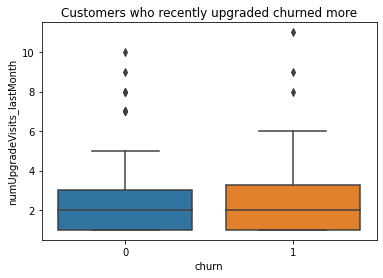

In [0]:
plt.title('Customers who recently upgraded churned more')
sns.boxplot(x="churn", y="numUpgradeVisits_lastMonth", data=all_data_pd)


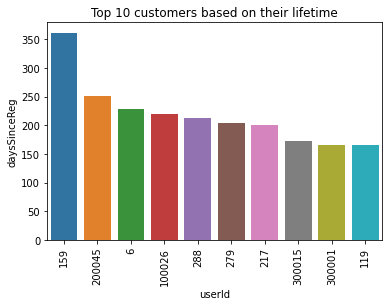

In [0]:
plt.xticks(rotation = 'vertical')
plt.title('Top 10 customers based on their lifetime')

g = sns.barplot(
    x='userId',
    y='daysSinceReg',
    data=all_data_pd.nlargest(10, 'daysSinceReg'),
)

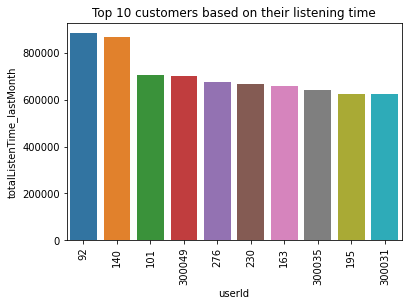

In [0]:
plt.xticks(rotation = 'vertical')
plt.title('Top 10 customers based on their listening time')

g = sns.barplot(
    x='userId',
    y='totalListenTime_lastMonth',
    data=all_data_pd.nlargest(10, 'totalListenTime_lastMonth'),
)

plt.ticklabel_format(style='plain', axis='y')

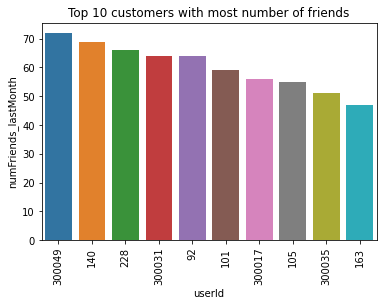

In [0]:
plt.xticks(rotation = 'vertical')
plt.title('Top 10 customers with most number of friends')

g = sns.barplot(
    x='userId',
    y='numFriends_lastMonth',
    data=all_data_pd.nlargest(10, 'numFriends_lastMonth'),
)

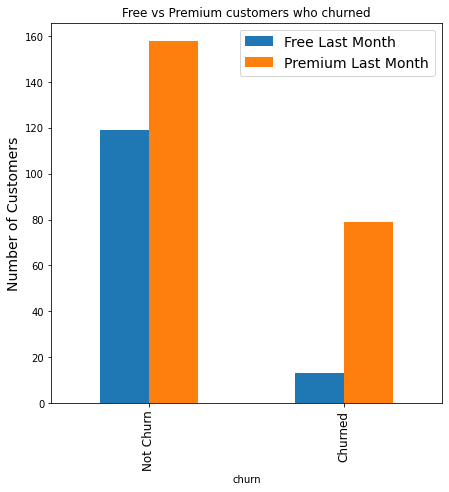

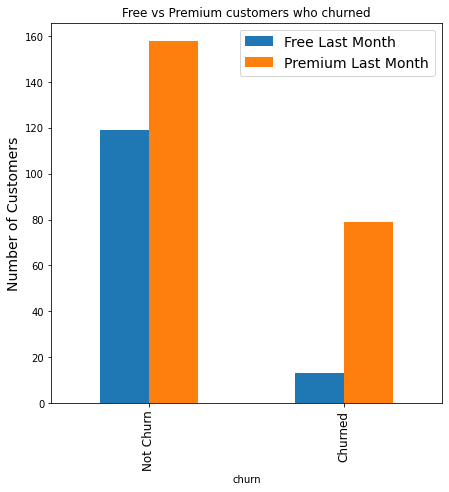

In [0]:
fig, ax = plt.subplots(figsize=(7,7))
all_data_pd.groupby(['churn', 'level_lastMonth']).agg({'level_lastMonth':'count'}).unstack().plot.bar(ax=ax);
ax.legend(["Free Last Month", "Premium Last Month"], fontsize=14);
ax.set_xticklabels(["Not Churn","Churned"], fontsize=12);
ax.set_ylabel("Number of Customers", fontsize=14);
ax.set_title("Free vs Premium customers who churned")
display(fig)

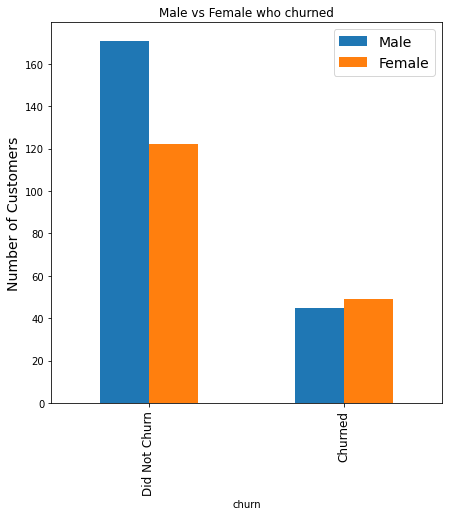

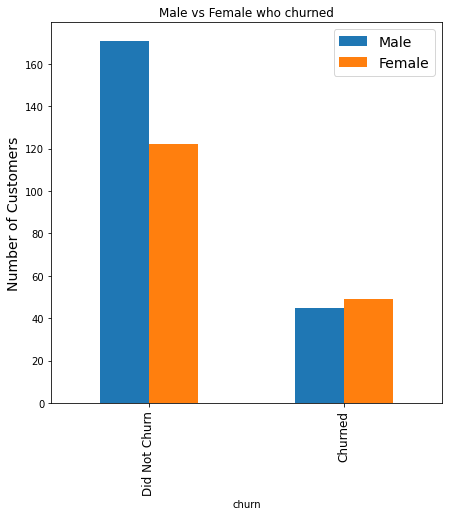

In [0]:
fig, ax = plt.subplots(figsize=(7,7))
all_data_pd.groupby(['churn', 'gender']).agg({'gender':'count'}).unstack().plot.bar(ax=ax);
ax.legend(["Male", "Female"], fontsize=14);
ax.set_xticklabels(["Did Not Churn","Churned"], fontsize=12);
ax.set_ylabel("Number of Customers", fontsize=14);
ax.set_title("Male vs Female who churned")
display(fig)

In [0]:
convert_numeric = ['userId', 'level', 'gender', 'level_lastMonth']
for feat in convert_numeric:
    featName = feat + "_n"
    all_data = all_data.withColumn(featName, all_data[feat].cast("float"))
    all_data = all_data.drop(feat)
    
# fill na/null values with 0
all_data = all_data.na.fill(0.0)

In [0]:
all_data.persist()

Out[485]: DataFrame[months_btw: bigint, numCancelVisits: bigint, numUpgradeVisits: bigint, numDowngradeVisits: bigint, numHomeVisits: bigint, numAboutVisits: bigint, numSettingsVisits: bigint, numSaveSettings: bigint, numLogouts: bigint, numAddPlaylists: bigint, numFriends: bigint, numThumbsUp: bigint, numThumbsDown: bigint, numAdverts: bigint, numSongsPlayed: bigint, totalListenTime: double, avgSongsPerSession: double, numSingersPlayed: bigint, numSessions: bigint, daysSinceReg_duplicated: int, daysSinceReg: int, churn: int, numCancelVisits_lastMonth: bigint, numUpgradeVisits_lastMonth: bigint, numDowngradeVisits_lastMonth: bigint, numHomeVisits_lastMonth: bigint, numAboutVisits_lastMonth: bigint, numSettingsVisits_lastMonth: bigint, numSaveSettings_lastMonth: bigint, numLogouts_lastMonth: bigint, numAddPlaylists_lastMonth: bigint, numFriends_lastMonth: bigint, numThumbsUp_lastMonth: bigint, numThumbsDown_lastMonth: bigint, numAdverts_lastMonth: bigint, numSongsPlayed_lastMonth: bigin

In [0]:
#Only modelling with the last month data
model_data = all_data.filter(all_data.months_btw>0) \
.select('userId_n', 'months_btw', 'numUpgradeVisits_lastMonth', 'numDowngradeVisits_lastMonth', 'numHomeVisits_lastMonth', 'numAboutVisits_lastMonth','numSettingsVisits_lastMonth',\
        'numSaveSettings_lastMonth','numLogouts_lastMonth', 'numAddPlaylists_lastMonth', 'numFriends_lastMonth', 'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth',\
        'numAdverts_lastMonth', 'numSongsPlayed_lastMonth', 'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth', 'numSingersPlayed_lastMonth', \
        'numSessions_lastMonth', 'level_lastMonth_n', 'gender_n', 'daysSinceReg', 'churn'
        ).withColumnRenamed('churn', 'label')

In [0]:
model_data.printSchema()

root
 |-- userId_n: float (nullable = false)
 |-- months_btw: long (nullable = true)
 |-- numUpgradeVisits_lastMonth: long (nullable = true)
 |-- numDowngradeVisits_lastMonth: long (nullable = true)
 |-- numHomeVisits_lastMonth: long (nullable = true)
 |-- numAboutVisits_lastMonth: long (nullable = true)
 |-- numSettingsVisits_lastMonth: long (nullable = true)
 |-- numSaveSettings_lastMonth: long (nullable = true)
 |-- numLogouts_lastMonth: long (nullable = true)
 |-- numAddPlaylists_lastMonth: long (nullable = true)
 |-- numFriends_lastMonth: long (nullable = true)
 |-- numThumbsUp_lastMonth: long (nullable = true)
 |-- numThumbsDown_lastMonth: long (nullable = true)
 |-- numAdverts_lastMonth: long (nullable = true)
 |-- numSongsPlayed_lastMonth: long (nullable = true)
 |-- totalListenTime_lastMonth: double (nullable = false)
 |-- avgSongsPerSession_lastMonth: double (nullable = false)
 |-- numSingersPlayed_lastMonth: long (nullable = true)
 |-- numSessions_lastMonth: long (nullable =

In [0]:
inputColumns = ['numUpgradeVisits_lastMonth', 'numDowngradeVisits_lastMonth', 'numHomeVisits_lastMonth', 'numAboutVisits_lastMonth', 'numSettingsVisits_lastMonth', 'numSaveSettings_lastMonth',\
                'numLogouts_lastMonth', 'numAddPlaylists_lastMonth', 'numFriends_lastMonth', 'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth', 'numAdverts_lastMonth', 'numSongsPlayed_lastMonth',\
                'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth', 'numSingersPlayed_lastMonth', 'numSessions_lastMonth', 'daysSinceReg']


assembler = VectorAssembler(inputCols=inputColumns, outputCol="FeaturesVec")

scaler = StandardScaler(inputCol="FeaturesVec", outputCol="features", withMean=True, withStd=True)

final_vector = VectorAssembler(inputCols=['level_lastMonth_n', 'gender_n']+['features'], 
                               outputCol='features_vector')

In [0]:
# Transform data
model_data = assembler.transform(model_data)

model_data_feature_standardize = scaler.fit(model_data)
model_data = model_data_feature_standardize.transform(model_data)

model_data = final_vector.transform(model_data)

In [0]:
model_data.printSchema()

root
 |-- userId_n: float (nullable = false)
 |-- months_btw: long (nullable = true)
 |-- numUpgradeVisits_lastMonth: long (nullable = true)
 |-- numDowngradeVisits_lastMonth: long (nullable = true)
 |-- numHomeVisits_lastMonth: long (nullable = true)
 |-- numAboutVisits_lastMonth: long (nullable = true)
 |-- numSettingsVisits_lastMonth: long (nullable = true)
 |-- numSaveSettings_lastMonth: long (nullable = true)
 |-- numLogouts_lastMonth: long (nullable = true)
 |-- numAddPlaylists_lastMonth: long (nullable = true)
 |-- numFriends_lastMonth: long (nullable = true)
 |-- numThumbsUp_lastMonth: long (nullable = true)
 |-- numThumbsDown_lastMonth: long (nullable = true)
 |-- numAdverts_lastMonth: long (nullable = true)
 |-- numSongsPlayed_lastMonth: long (nullable = true)
 |-- totalListenTime_lastMonth: double (nullable = false)
 |-- avgSongsPerSession_lastMonth: double (nullable = false)
 |-- numSingersPlayed_lastMonth: long (nullable = true)
 |-- numSessions_lastMonth: long (nullable =

In [0]:
#final data
model_data = model_data.select(model_data.label, model_data.features_vector)
model_data.show(5)

+-----+--------------------+
|label|     features_vector|
+-----+--------------------+
|    0|[0.0,0.0,-0.79722...|
|    1|[1.0,1.0,-0.79722...|
|    0|[0.0,0.0,0.804126...|
|    0|[0.0,0.0,0.270340...|
|    0|[1.0,1.0,-0.79722...|
+-----+--------------------+
only showing top 5 rows



In [0]:
train,test = model_data.randomSplit([0.6, 0.4], seed=40)

In [0]:
def evaluate_model(results):
    """ Prints the confusion matrix """
    tn = results.filter((results.prediction == 0)&(results.label==0)).count() * 1.0 # true negative
    fp = results.filter((results.prediction == 1)&(results.label==0)).count() * 1.0 # false positive
    fn = results.filter((results.prediction == 0)&(results.label==1)).count() * 1.0 # false negative
    tp = results.filter((results.prediction == 1)&(results.label==1)).count() * 1.0 # true positive
    print("Confusion Matrix")
    print("TN:{} | FP:{}".format(tn,fp))
    print("FN:{} | TP: {}".format(fn, tp))
    print("--------------")
    evaluator = MulticlassClassificationEvaluator(predictionCol='prediction')
    evaluator.setLabelCol('label')
    accuracy = evaluator.evaluate(results, {evaluator.metricName : 'accuracy'})
    f1 = evaluator.evaluate(results, {evaluator.metricName : 'f1'})
# #     precision = evaluator.evaluate(results, {evaluator.metricName : 'precision'})
#     recall = evaluator.evaluate(results, {evaluator.metricName : 'recall'})
#     accuracy = (tp+tn)/(tn+fp+fn+tp) 
    precision = tp/(tp+fp) if tp+fp!=0 else 0
    recall = tp/(tp+fn) if tp+fn!=0 else 0
#     f1 = 2.0 * (precision * recall)/(precision + recall)
    print("F1-Score: {}".format(f1))
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
    print("Accuracy: {}".format(accuracy))

In [0]:
#baseline model
baseline = test.withColumn('prediction', lit(0.0))
baseline.show(5)

+-----+--------------------+----------+
|label|     features_vector|prediction|
+-----+--------------------+----------+
|    0|[0.0,0.0,-0.79722...|       0.0|
|    0|[0.0,0.0,0.804126...|       0.0|
|    1|[1.0,1.0,-0.79722...|       0.0|
|    0|[0.0,0.0,0.270340...|       0.0|
|    0|[1.0,0.0,-0.79722...|       0.0|
+-----+--------------------+----------+
only showing top 5 rows



In [0]:
#print baseline model
baseline_result = evaluate_model(baseline)

Confusion Matrix
TN:117.0 | FP:0.0
FN:44.0 | TP: 0.0
--------------
F1-Score: 0.6116895303632871
Precision: 0
Recall: 0.0
Accuracy: 0.7267080745341615


In [0]:
START = time.time()
numFolds = 2
lr = LogisticRegression(maxIter=10, labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[lr])
lr_paramGrid = (ParamGridBuilder()
                .addGrid(lr.regParam, [0.01])
                .build())


crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=lr_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

lr_start = time.time()
lr_model = crossval.fit(train)
lr_end = time.time()

In [0]:
lr_results = lr_model.transform(test)

lr_safe = evaluate_model(lr_results)

best_param = list(lr_model.getEstimatorParamMaps()[np.argmax(lr_model.avgMetrics)].values())
print('Best regression parameter is {}'.format(best_param[0]))

Confusion Matrix
TN:114.0 | FP:3.0
FN:38.0 | TP: 6.0
--------------
F1-Score: 0.6778232943869351
Precision: 0.6666666666666666
Recall: 0.13636363636363635
Accuracy: 0.7453416149068323
Best regression parameter is 0.01


In [0]:
START = time.time()
numFolds = 2
lr = LogisticRegression(maxIter=10, labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[lr])
lr_paramGrid = (ParamGridBuilder()
                .addGrid(lr.regParam, [0.1, 0.01, 0.001])
                .build())


crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=lr_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

lr_start = time.time()
lr_model = crossval.fit(train)
lr_end = time.time()

In [0]:
lr_results = lr_model.transform(test)

lr_safe = evaluate_model(lr_results)

best_param = list(lr_model.getEstimatorParamMaps()[np.argmax(lr_model.avgMetrics)].values())
print('Best regression parameter is {}'.format(best_param[0]))

Confusion Matrix
TN:114.0 | FP:3.0
FN:34.0 | TP: 10.0
--------------
F1-Score: 0.7211350772336913
Precision: 0.7692307692307693
Recall: 0.22727272727272727
Accuracy: 0.7701863354037267
Best regression parameter is 0.001


In [0]:
START = time.time()
numFolds = 3
lr = LogisticRegression(maxIter=10, labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[lr])
lr_paramGrid = (ParamGridBuilder()
                .addGrid(lr.regParam, [0.1, 0.01, 0.001])
                .build())


crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=lr_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

lr_start = time.time()
lr_model = crossval.fit(train)
lr_end = time.time()

In [0]:
lr_results = lr_model.transform(test)

lr_safe = evaluate_model(lr_results)

best_param = list(lr_model.getEstimatorParamMaps()[np.argmax(lr_model.avgMetrics)].values())
print('Best regression parameter is {}'.format(best_param[0]))

Confusion Matrix
TN:115.0 | FP:2.0
FN:41.0 | TP: 3.0
--------------
F1-Score: 0.6457092153631638
Precision: 0.6
Recall: 0.06818181818181818
Accuracy: 0.7329192546583851
Best regression parameter is 0.1


In [0]:
START = time.time()
numFolds = 4
lr = LogisticRegression(maxIter=10, labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[lr])
lr_paramGrid = (ParamGridBuilder()
                .addGrid(lr.regParam, [0.1, 0.01, 0.001])
                .build())


crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=lr_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

lr_start = time.time()
lr_model = crossval.fit(train)
lr_end = time.time()

In [0]:
lr_results = lr_model.transform(test)

lr_safe = evaluate_model(lr_results)

best_param = list(lr_model.getEstimatorParamMaps()[np.argmax(lr_model.avgMetrics)].values())
print('Best regression parameter is {}'.format(best_param[0]))

Confusion Matrix
TN:114.0 | FP:3.0
FN:38.0 | TP: 6.0
--------------
F1-Score: 0.6778232943869351
Precision: 0.6666666666666666
Recall: 0.13636363636363635
Accuracy: 0.7453416149068323
Best regression parameter is 0.01


In [0]:
numFolds = 2
rf = RandomForestClassifier(labelCol='label', featuresCol='features_vector', seed = 42)
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[rf])
rf_paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10,20])
             .addGrid(rf.maxDepth, [10,20])
             .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=rf_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

rf_start = time.time()
rf_model = crossval.fit(train)
rf_end = time.time()

In [0]:
rf_results = rf_model.transform(test)

rf_safe = evaluate_model(rf_results)

best_param = list(rf_model.getEstimatorParamMaps()[np.argmax(rf_model.avgMetrics)].values())
print('Best number of trees {}, best depth {}'.format(best_param[0], best_param[1]))

Confusion Matrix
TN:112.0 | FP:5.0
FN:32.0 | TP: 12.0
--------------
F1-Score: 0.7312128479085984
Precision: 0.7058823529411765
Recall: 0.2727272727272727
Accuracy: 0.7701863354037267
Best number of trees 10, best depth 20


In [0]:
numFolds = 3
rf = RandomForestClassifier(labelCol='label', featuresCol='features_vector', seed = 42)
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[rf])
rf_paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10,20])
             .addGrid(rf.maxDepth, [10,20])
             .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=rf_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

rf_start = time.time()
rf_model = crossval.fit(train)
rf_end = time.time()

In [0]:
rf_results = rf_model.transform(test)

rf_safe = evaluate_model(rf_results)

best_param = list(rf_model.getEstimatorParamMaps()[np.argmax(rf_model.avgMetrics)].values())
print('Best number of trees {}, best depth {}'.format(best_param[0], best_param[1]))

Confusion Matrix
TN:114.0 | FP:3.0
FN:35.0 | TP: 9.0
--------------
F1-Score: 0.7107364685004436
Precision: 0.75
Recall: 0.20454545454545456
Accuracy: 0.7639751552795031
Best number of trees 20, best depth 10


In [0]:
numFolds = 4
rf = RandomForestClassifier(labelCol='label', featuresCol='features_vector', seed = 42)
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[rf])
rf_paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10,20])
             .addGrid(rf.maxDepth, [10,20])
             .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=rf_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

rf_start = time.time()
rf_model = crossval.fit(train)
rf_end = time.time()

In [0]:
rf_results = rf_model.transform(test)

rf_safe = evaluate_model(rf_results)

best_param = list(rf_model.getEstimatorParamMaps()[np.argmax(rf_model.avgMetrics)].values())
print('Best number of trees {}, best depth {}'.format(best_param[0], best_param[1]))

Confusion Matrix
TN:115.0 | FP:2.0
FN:35.0 | TP: 9.0
--------------
F1-Score: 0.7154442040616931
Precision: 0.8181818181818182
Recall: 0.20454545454545456
Accuracy: 0.7701863354037267
Best number of trees 20, best depth 20


In [0]:
numFolds = 2
svc = LinearSVC(labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[svc])
svc_paramGrid = (ParamGridBuilder()
                 .addGrid(svc.maxIter, [5,10])
                 .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=svc_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

svc_start = time.time()
svc_model = crossval.fit(train)
svc_end = time.time()

In [0]:
svc_results = svc_model.transform(test)

svc_safe = evaluate_model(svc_results)

best_param = list(svc_model.getEstimatorParamMaps()[np.argmax(svc_model.avgMetrics)].values())
print('Best number of iterations {}'.format(best_param[0]))

Confusion Matrix
TN:117.0 | FP:0.0
FN:44.0 | TP: 0.0
--------------
F1-Score: 0.6116895303632871
Precision: 0
Recall: 0.0
Accuracy: 0.7267080745341615
Best number of iterations 10


In [0]:
numFolds = 3
svc = LinearSVC(labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[svc])
svc_paramGrid = (ParamGridBuilder()
                 .addGrid(svc.maxIter, [5,10])
                 .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=svc_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

svc_start = time.time()
svc_model = crossval.fit(train)
svc_end = time.time()

In [0]:
svc_results = svc_model.transform(test)

svc_safe = evaluate_model(svc_results)

best_param = list(svc_model.getEstimatorParamMaps()[np.argmax(svc_model.avgMetrics)].values())
print('Best number of iterations {}'.format(best_param[0]))

Confusion Matrix
TN:117.0 | FP:0.0
FN:44.0 | TP: 0.0
--------------
F1-Score: 0.6116895303632871
Precision: 0
Recall: 0.0
Accuracy: 0.7267080745341615
Best number of iterations 10


In [0]:
numFolds = 4
svc = LinearSVC(labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[svc])
svc_paramGrid = (ParamGridBuilder()
                 .addGrid(svc.maxIter, [5,10])
                 .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=svc_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

svc_start = time.time()
svc_model = crossval.fit(train)
svc_end = time.time()

In [0]:
svc_results = svc_model.transform(test)

svc_safe = evaluate_model(svc_results)

best_param = list(svc_model.getEstimatorParamMaps()[np.argmax(svc_model.avgMetrics)].values())
print('Best number of iterations {}'.format(best_param[0]))

Confusion Matrix
TN:117.0 | FP:0.0
FN:44.0 | TP: 0.0
--------------
F1-Score: 0.6116895303632871
Precision: 0
Recall: 0.0
Accuracy: 0.7267080745341615
Best number of iterations 10


In [0]:
numFolds = 2
gbt = GBTClassifier(labelCol='label', featuresCol='features_vector', seed = 42)
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[gbt])
gbt_paramGrid = (ParamGridBuilder()
                 .addGrid(gbt.maxIter, [10,20])
                 .addGrid(gbt.maxDepth, [10,20])
                 .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=gbt_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

gbt_start = time.time()
gbt_model = crossval.fit(train)
gbt_end = time.time()

In [0]:
gbt_results = gbt_model.transform(test)

gbt_safe = evaluate_model(gbt_results)

best_param = list(gbt_model.getEstimatorParamMaps()[np.argmax(rf_model.avgMetrics)].values())
print('Best number of iterations {}, best depth {}'.format(best_param[0], best_param[1]))

Confusion Matrix
TN:101.0 | FP:16.0
FN:35.0 | TP: 9.0
--------------
F1-Score: 0.6515110598286402
Precision: 0.36
Recall: 0.20454545454545456
Accuracy: 0.6832298136645962
Best number of iterations 20, best depth 20


In [0]:
numFolds = 3
gbt = GBTClassifier(labelCol='label', featuresCol='features_vector', seed = 42)
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[gbt])
gbt_paramGrid = (ParamGridBuilder()
                 .addGrid(gbt.maxIter, [10,20])
                 .addGrid(gbt.maxDepth, [10,20])
                 .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=gbt_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

gbt_start = time.time()
gbt_model = crossval.fit(train)
gbt_end = time.time()

In [0]:
gbt_results = gbt_model.transform(test)

gbt_safe = evaluate_model(gbt_results)

best_param = list(gbt_model.getEstimatorParamMaps()[np.argmax(rf_model.avgMetrics)].values())
print('Best number of iterations {}, best depth {}'.format(best_param[0], best_param[1]))

Confusion Matrix
TN:99.0 | FP:18.0
FN:34.0 | TP: 10.0
--------------
F1-Score: 0.6514672187715667
Precision: 0.35714285714285715
Recall: 0.22727272727272727
Accuracy: 0.6770186335403726
Best number of iterations 20, best depth 20


[2.40973496e-02 5.39943348e-02 1.01154713e-01 8.89396279e-02
 2.49216860e-02 1.33183241e-02 1.14129336e-01 1.21704376e-02
 5.81418162e-02 1.28640086e-01 5.87154653e-02 6.49960560e-02
 3.14108545e-02 1.11145538e-01 5.75100197e-02 1.02962980e-16
 1.12411060e-03 0.00000000e+00 1.20677857e-02 4.35224599e-02]


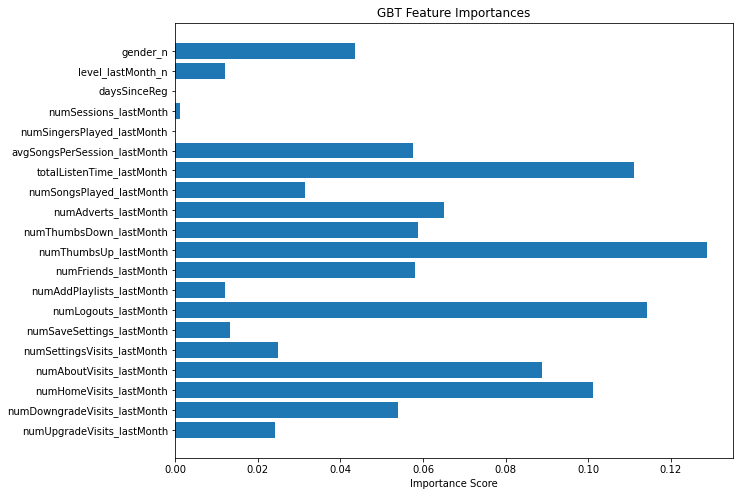

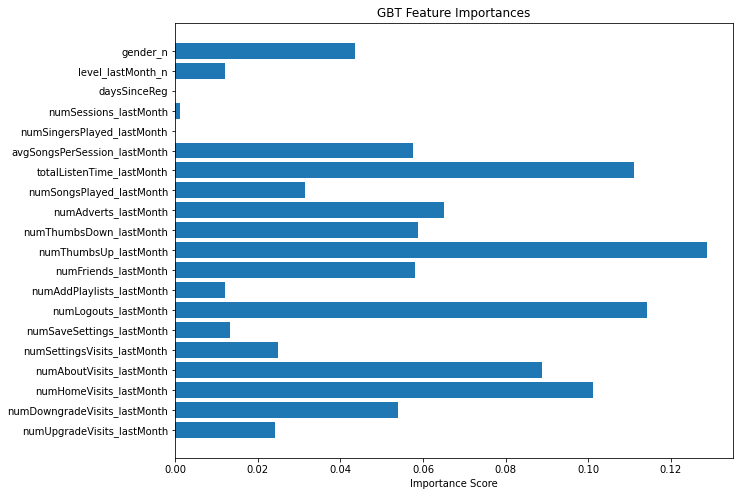

In [0]:
importances = gbt_model.bestModel.stages[-1].featureImportances.toArray()
print(importances)

inputColumns = ['numUpgradeVisits_lastMonth', 'numDowngradeVisits_lastMonth', 'numHomeVisits_lastMonth', 'numAboutVisits_lastMonth', 'numSettingsVisits_lastMonth', 'numSaveSettings_lastMonth',\
                'numLogouts_lastMonth', 'numAddPlaylists_lastMonth', 'numFriends_lastMonth', 'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth', 'numAdverts_lastMonth', 'numSongsPlayed_lastMonth',\
                'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth', 'numSingersPlayed_lastMonth', 'numSessions_lastMonth', 'daysSinceReg', 'level_lastMonth_n', 'gender_n']

y_pos = np.arange(len(inputColumns))
    
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(y_pos, importances)
plt.yticks(y_pos, inputColumns);
plt.xlabel('Importance Score');
plt.title('GBT Feature Importances');
display(fig)